# Librerías

In [ ]:
!pip install tensorflow keras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
import numpy as np
import json

# conexión a la base de datos Mongo DB

In [ ]:
# Ruta del archivo JSON
ruta_archivo = '/content/D_players_ligaMX.json'

# Leer el archivo JSON y convertirlo en un DataFrame
df = pd.read_json(ruta_archivo)

# Mostrar el DataFrame
print(df)


                            _id  cards_red  cards_yellow  dribbles_success  \
0      66e4bad18c03f0ca74351e4b          0             0               0.0   
1      66e4bad18c03f0ca74351e4c          0             0               NaN   
2      66e4bad18c03f0ca74351e4d          0             0               NaN   
3      66e4bad18c03f0ca74351e4e          0             0               NaN   
4      66e4bad18c03f0ca74351e4f          0             0               NaN   
...                         ...        ...           ...               ...   
87782  66e4bad88c03f0ca74412e89          0             0               NaN   
87783  66e4bad88c03f0ca74412e8a          0             0               NaN   
87784  66e4bad88c03f0ca74412e8b          0             0               NaN   
87785  66e4bad88c03f0ca74412e8c          0             0               1.0   
87786  66e4bad88c03f0ca74412ebc          0             0               NaN   

       duels_won  fould_committed  fouls_drawn games_captain  g

# Limpieza y transformación de datos

In [ ]:
# Suponiendo que tienes un DataFrame llamado "df"
print(df.isnull().sum())

_id                     0
cards_red               0
cards_yellow            0
dribbles_success    42482
duels_won           21321
fould_committed     35021
fouls_drawn         36626
games_captain           0
games_minutes       14892
games_position          0
games_subtitute         0
goals_assists       82500
goals_concedes          0
goals_saves         82951
goals_total         81939
id_fixture              0
offsides            81756
passes_key          39818
passes_total        15486
penalty_won         87065
player                  0
shots               39152
tackles             47406
team                    0
dtype: int64


In [ ]:
#cambiar NAN por 0
df = df.fillna(0)

In [ ]:
# Reemplazar 'false' por 0 y 'true' por 1
#df['games_captain'] = df['games_captain'].replace({'false': 0, 'true': 1})

# Convertir el campo a entero
#df['games_captain'] = df['games_captain'].astype(int)

# Ver los valores únicos después de la conversión
#print(df['games_captain'].unique())


[0 1]


In [ ]:
# Codificar variables categóricas en índices
games_position = LabelEncoder()
id_fixture= LabelEncoder()
team = LabelEncoder()
player = LabelEncoder()
games_captain = LabelEncoder()
games_subtitute = LabelEncoder()

df['games_position'] = games_position.fit_transform(df['games_position'])
df['id_fixture'] = id_fixture.fit_transform(df['id_fixture'])
df['team'] = team.fit_transform(df['team'])
df['player'] = player.fit_transform(df['player'])
df['games_captain'] = games_captain.fit_transform(df['games_captain'])
df['games_subtitute'] = games_subtitute.fit_transform(df['games_subtitute'])


In [ ]:
# Imprimir los valores únicos y sus correspondientes índices numéricos
for i, label in enumerate(id_fixture.classes_):
    print(f"El valor '{label}' ahora es {i}")

In [ ]:
# Imprimir los nombres de las columnas
print(df.columns)

Index(['_id', 'cards_red', 'cards_yellow', 'dribbles_success', 'duels_won',
       'fould_committed', 'fouls_drawn', 'games_captain', 'games_minutes',
       'games_position', 'games_subtitute', 'goals_assists', 'goals_concedes',
       'goals_saves', 'goals_total', 'id_fixture', 'offsides', 'passes_key',
       'passes_total', 'penalty_won', 'player', 'shots', 'tackles', 'team'],
      dtype='object')


In [ ]:
# Normalizar el valor numérico de los campos
scaler = MinMaxScaler()
df['games_minutes'] = scaler.fit_transform(df[['games_minutes']])
df['offsides'] = scaler.fit_transform(df[['offsides']])
df['shots'] = scaler.fit_transform(df[['shots']])
df['goals_total'] = scaler.fit_transform(df[['goals_total']])
df['goals_concedes'] = scaler.fit_transform(df[['goals_concedes']])
df['goals_assists'] = scaler.fit_transform(df[['goals_assists']])
df['goals_saves'] = scaler.fit_transform(df[['goals_saves']])
df['passes_total'] = scaler.fit_transform(df[['passes_total']])
df['passes_key'] = scaler.fit_transform(df[['passes_key']])
df['tackles'] = scaler.fit_transform(df[['tackles']])
df['duels_won'] = scaler.fit_transform(df[['duels_won']])
df['dribbles_success'] = scaler.fit_transform(df[['dribbles_success']])
df['fouls_drawn'] = scaler.fit_transform(df[['fouls_drawn']])
df['fould_committed'] = scaler.fit_transform(df[['fould_committed']])
df['cards_yellow'] = scaler.fit_transform(df[['cards_yellow']])
df['cards_red'] = scaler.fit_transform(df[['cards_red']])
df['penalty_won'] = scaler.fit_transform(df[['penalty_won']])

In [ ]:
# Variables para el modelo
categorical_features = df[['id_fixture', 'team', 'player', 'games_position', 'games_captain', 'games_subtitute']]
numerical_features = df[['games_minutes', 'offsides', 'shots', 'goals_total',
                         'goals_concedes', 'goals_assists', 'goals_saves', 'passes_total',
                         'passes_key', 'tackles', 'duels_won', 'dribbles_success', 'fouls_drawn',
                         'fould_committed', 'cards_yellow', 'cards_red', 'penalty_won']]


# Embedding

In [ ]:
# Parámetros de embeddings
embedding_size = 1
num_fixture = len(df['id_fixture'].unique())
num_team = len(df['team'].unique())
num_player = len(df['player'].unique())
num_games_position = len(df['games_position'].unique())
num_games_captain = len(df['games_captain'].unique())
num_games_subtitute = len(df['games_subtitute'].unique())

# Definir las entradas
input_fixture = Input(shape=(1,), name='id_fixture')
input_team = Input(shape=(1,), name='team')
input_player = Input(shape=(1,), name='player')
input_games_position = Input(shape=(1,), name='games_position')
input_games_captain = Input(shape=(1,), name='games_captain')
input_games_subtitute = Input(shape=(1,), name='games_subtitute')
input_games_minutes = Input(shape=(1,), name='games_minutes')
input_offsides = Input(shape=(1,), name='offsides')
input_shots = Input(shape=(1,), name='shots')
input_goals_total = Input(shape=(1,), name='goals_total')
input_goals_concedes= Input(shape=(1,), name='goals_concedes')
input_goals_assists = Input(shape=(1,), name='goals_assists')
input_goals_saves = Input(shape=(1,), name='goals_saves')
input_passes_total = Input(shape=(1,), name='passes_total')
input_passes_key= Input(shape=(1,), name='passes_key')
input_tackles = Input(shape=(1,), name='tackles')
input_duels_won = Input(shape=(1,), name='duels_won')
input_dribbles_success = Input(shape=(1,), name='dribbles_success')
input_fouls_drawn= Input(shape=(1,), name='fouls_drawn')
input_fould_committed= Input(shape=(1,), name='fould_committed')
input_cards_yellow= Input(shape=(1,), name='cards_yellow')
input_cards_red= Input(shape=(1,), name='cards_red')
input_penalty_won= Input(shape=(1,), name='penalty_won')

# Definir las capas de embedding
embedding_fixture = Embedding(input_dim= num_fixture, output_dim=embedding_size)(input_fixture)
embedding_team = Embedding(input_dim= num_team, output_dim=embedding_size)(input_team)
embedding_player = Embedding(input_dim= num_player, output_dim=embedding_size)(input_player)
embedding_games_position = Embedding(input_dim= num_games_position, output_dim=embedding_size)(input_games_position)
embedding_games_captain = Embedding(input_dim= num_games_captain, output_dim=embedding_size)(input_games_captain)
embedding_games_subtitute = Embedding(input_dim= num_games_subtitute, output_dim=embedding_size)(input_games_subtitute)

# Aplanar las salidas de embeddings
flatten_fixture = Flatten()(embedding_fixture)
flatten_team = Flatten()(embedding_team)
flatten_player = Flatten()(embedding_player)
flatten_games_position = Flatten()(embedding_games_position)
flatten_games_captain = Flatten()(embedding_games_captain)
flatten_games_subtitute = Flatten()(embedding_games_subtitute)

# Concatenar todas las características
concat_features = Concatenate()([flatten_fixture, flatten_team, flatten_player, flatten_games_position,
                                flatten_games_captain, flatten_games_subtitute, input_games_minutes, input_offsides, input_shots,
                                input_goals_total, input_goals_concedes, input_goals_assists, input_goals_saves,
                                 input_passes_total, input_passes_key, input_tackles, input_duels_won, input_dribbles_success,
                                 input_fouls_drawn, input_fould_committed, input_cards_yellow, input_cards_red,
                                 input_penalty_won])

# Capas densas
dense_1 = Dense(64, activation='relu')(concat_features)  # Primera capa densa
dense_2 = Dense(32, activation='relu')(dense_1)  # Segunda capa densa
dropout_1 = Dropout(0.3)(dense_2)  # Dropout para evitar sobreajuste
dense_3 = Dense(16, activation='relu')(dropout_1)  # Tercera capa densa
dropout_2 = Dropout(0.3)(dense_3)  # Otro dropout

# Capa de salida
output = Dense(1, activation='linear')(dropout_2)

# Crear el modelo
model = Model(inputs=[input_fixture, input_team, input_player, input_games_position, input_games_captain, input_games_subtitute,
                      input_games_minutes, input_offsides, input_shots, input_goals_total, input_goals_concedes,
                      input_goals_assists, input_goals_saves, input_passes_total, input_passes_key, input_tackles,
                      input_duels_won, input_dribbles_success, input_fouls_drawn, input_fould_committed,
                      input_cards_yellow, input_cards_red, input_penalty_won], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')





In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df'
print(df.dtypes)

# Modelo

In [ ]:
# X_train debería coincidir con los inputs que definiste en el modelo.
X_train = [df['id_fixture'].values, df['team'].values, df['player'].values,
           df['games_position'].values, df['games_captain'].values, df['games_subtitute'].values,
           df['games_minutes'].values, df['offsides'].values, df['shots'].values,
           df['goals_total'].values, df['goals_concedes'].values, df['goals_assists'].values,
           df['goals_saves'].values, df['passes_total'].values, df['passes_key'].values,
           df['tackles'].values, df['duels_won'].values, df['dribbles_success'].values,
           df['fouls_drawn'].values, df['fould_committed'].values, df['cards_yellow'].values,
           df['cards_red'].values, df['penalty_won'].values]

# La variable y_train debe contener tus etiquetas verdaderas (no valores aleatorios).
#y_train = df['valor_real'].values  # Reemplaza 'valor_real' por tu variable objetivo.
y_train = np.random.rand(len(df))  # Valores aleatorios como ejemplo; reemplaza con tus valores



In [ ]:
print(f"num_fixture: {num_fixture}")
print(f"num_team: {num_team}")
print(f"num_player: {num_player}")
print(f"num_games_position: {num_games_position}")
print(f"num_games_captain: {num_games_captain}")
print(f"num_games_subtitute: {num_games_subtitute}")


num_fixture: 2499
num_team: 24
num_player: 1712
num_games_position: 4
num_games_captain: 2
num_games_subtitute: 2


In [ ]:
print(df[['id_fixture', 'team', 'player', 'games_position', 'games_captain', 'games_subtitute']].max())


id_fixture         2498
team                 23
player             1711
games_position        3
games_captain         1
games_subtitute       1
dtype: int64


In [ ]:
df['id_fixture'].unique()

In [ ]:
# Verificar IDs que no están en el rango de valores únicos
missing_ids = set(df['id_fixture']) - set(range(len(df['id_fixture'].unique())))
print(f"IDs faltantes o repetidos: {missing_ids}")

In [ ]:
# Entrenar el modelo
historial = model.fit(X_train, y_train, epochs=400, verbose=1)

Epoch 1/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0981
Epoch 2/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0834
Epoch 3/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0830
Epoch 4/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0826
Epoch 5/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0826
Epoch 6/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0816
Epoch 7/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0812
Epoch 8/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0814
Epoch 9/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0807
Epoch 10/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0800
Epoch 11/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0803
Epoch 12/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0800
Epoch 13/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0801
Epoch 14/400
2744/2744 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0795
Epoch 15/4

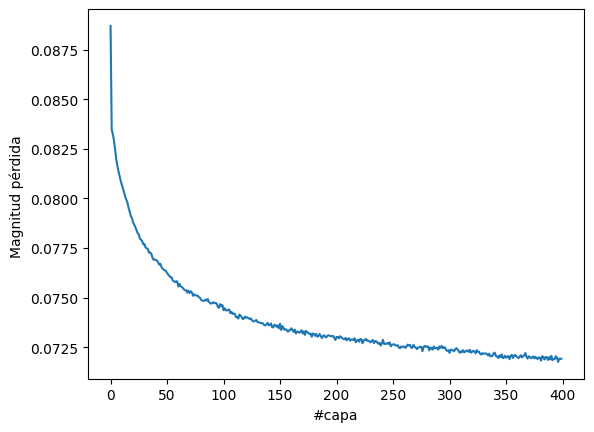

In [ ]:
import matplotlib.pyplot as plt

# Para que los gráficos se muestren dentro del notebook de Colab
%matplotlib inline

plt.xlabel("#capa")
plt.ylabel("Magnitud pérdida ")
plt.plot(historial.history["loss"])
plt.show()


# Capas y resultados del embedding

In [ ]:
# Obtener las capas de embedding
embedding_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Embedding)]

for i, layer in enumerate(embedding_layers):
    print(f"Embedding layer {i} weights:")
    print(layer.get_weights()[0])


In [ ]:
import numpy as np
import pandas as pd

# Supongamos que ya tienes los embeddings y los índices obtenidos de tu modelo
# Estos son solo ejemplos; usa los valores reales obtenidos de tu modelo

# Ejemplo de *embeddings* obtenidos para las variables categóricas
embedding_layer_fixture = embedding_layers[0].get_weights()[0]
embedding_layer_team = embedding_layers[1].get_weights()[0]
embedding_layer_player = embedding_layers[2].get_weights()[0]
embedding_layer_position = embedding_layers[3].get_weights()[0]
embedding_layer_captain = embedding_layers[4].get_weights()[0]
embedding_layer_subtitute = embedding_layers[5].get_weights()[0]

# Función para obtener embeddings de cada jugador, incluyendo variables numéricas
def get_player_embeddings(df, embedding_layer_fixture, embedding_layer_team, embedding_layer_player,
                          embedding_layer_position, embedding_layer_captain, embedding_layer_subtitute):
    embeddings = []

    for _, row in df.iterrows():
        # Obtener los embeddings de las variables categóricas
        fixture_embedding = embedding_layer_fixture[row['id_fixture']]
        team_embedding = embedding_layer_team[row['team']]
        player_embedding = embedding_layer_player[row['player']]
        position_embedding = embedding_layer_position[row['games_position']]
        captain_embedding = embedding_layer_captain[row['games_captain']]
        subtitute_embedding = embedding_layer_subtitute[row['games_subtitute']]

        # Combinar todos los embeddings categóricos
        categorical_embedding = np.concatenate([fixture_embedding, team_embedding, player_embedding,
                                                position_embedding, captain_embedding, subtitute_embedding ])

        # Añadir las características numéricas sin embeddings
        numerical_features = row[['games_minutes', 'offsides', 'shots', 'goals_total', 'goals_concedes',
                                  'goals_assists', 'goals_saves', 'passes_total', 'passes_key', 'tackles',
                                  'duels_won', 'dribbles_success', 'fouls_drawn', 'fould_committed',
                                  'cards_yellow', 'cards_red', 'penalty_won']].values

        # Combinar embeddings categóricos y características numéricas
        combined_embedding = np.concatenate([categorical_embedding, numerical_features])
        embeddings.append(combined_embedding)

    return np.array(embeddings)

# Obtener embeddings para todos los jugadores
player_embeddings = get_player_embeddings(df, embedding_layer_fixture, embedding_layer_team,
                                          embedding_layer_player, embedding_layer_position, embedding_layer_captain,
                                          embedding_layer_subtitute)

# Imprimir los resultados
player_df = pd.DataFrame(player_embeddings, columns=[f'feature_{i}' for i in range(player_embeddings.shape[1])])
print(player_df)


      feature_0 feature_1 feature_2 feature_3 feature_4 feature_5 feature_6  \
0     -0.080638   0.72588 -0.007232  0.202316  0.047564  0.029023  0.491667   
1     -1.391205  0.198512 -0.007232  0.202316  0.047564 -0.180065       0.0   
2     -0.465725  0.372188 -0.007232  0.191516  0.047564 -0.180065       0.0   
3     -0.638353  0.030654 -0.007232  0.202316  0.047564 -0.180065       0.0   
4     -0.638353  0.030654 -0.007232  0.202316  0.047564 -0.180065       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
87782 -2.842792  0.372188  0.423835  0.202316  0.047564 -0.180065       0.1   
87783 -1.133762  0.372188  0.423835  0.202316  0.047564 -0.180065       0.0   
87784 -2.115005  0.372188 -0.255451  0.202316  0.047564 -0.180065       0.0   
87785 -1.133762  0.372188 -0.255451  0.202316  0.047564  0.029023  0.491667   
87786   1.52208  0.516442 -1.014888 -0.238665  0.047564 -0.180065       0.0   

      feature_7 feature_8 feature_9  ... feature_13

In [ ]:
# Guardar los embeddings en un archivo .npy
np.save('player_embeddings.npy', player_embeddings)


In [ ]:
import numpy as np
import json
# Convertir el DataFrame a una lista de diccionarios
player_list = player_df.to_dict(orient='records')
# Guardar la lista en un archivo JSON
with open('player_embeddings.json', 'w') as json_file:
    json.dump(player_list, json_file)
